<h1> Unit 11 Homework</h1>
<h3> W203 Statistics for Data Science </h3>

Student Name: **Suhas Gupta**

Section Number: **Section 7**

** Data: ** You receive a data set from World Bank Development Indicators. 

<h3> 1 Get Familiar </h3>

**1.1**  Load the data using `load` and see what is loaded by using `ls()`. You should see `Data` which is the data frame including data, and `Definitions` which is a data frame that includes variable names.

In [410]:
library(dplyr)
library(stargazer)
library(carData)
load("Week11.Rdata")
str(Data)
summary(Data)
(Definitions)

'data.frame':	264 obs. of  13 variables:
 $ Country.Name     : Factor w/ 267 levels "","Afghanistan",..: 2 3 4 5 6 7 8 9 10 11 ...
 $ Country.Code     : Factor w/ 265 levels "","ABW","ADO",..: 4 6 59 11 3 5 12 7 9 10 ...
 $ AG.LND.FRST.ZS   : num  2.068 28.245 0.813 88.133 34.043 ...
 $ MS.MIL.MPRT.KD   : num  3.59e+08 9.00e+06 7.22e+08 NaN NaN ...
 $ MS.MIL.XPND.GD.ZS: num  1.38 1.41 4.84 NaN NaN ...
 $ MS.MIL.XPND.ZS   : num  3.18 NaN 14.51 NaN NaN ...
 $ MS.MIL.XPRT.KD   : num  NaN 0e+00 NaN NaN NaN NaN NaN NaN 1e+06 NaN ...
 $ NE.EXP.GNFS.CD   : num  1.30e+09 3.96e+09 7.03e+10 NaN NaN ...
 $ NE.IMP.GNFS.CD   : num  8.53e+09 6.37e+09 5.99e+10 NaN NaN ...
 $ NY.GDP.MKTP.CD   : num  1.89e+10 1.24e+10 1.93e+11 NaN 3.29e+09 ...
 $ NY.GDP.PCAP.CD   : num  627 4291 5114 NaN 40936 ...
 $ NY.GDP.PETR.RT.ZS: num  0 4.1 22.4 NaN 0 ...
 $ TX.VAL.AGRI.ZS.UN: num  4.793 2.201 0.016 NaN NaN ...


         Country.Name  Country.Code AG.LND.FRST.ZS  MS.MIL.MPRT.KD     
 Afghanistan   :  1   ABW    :  1   Min.   : 0.00   Min.   :0.000e+00  
 Albania       :  1   ADO    :  1   1st Qu.:12.47   1st Qu.:1.081e+07  
 Algeria       :  1   AFG    :  1   Median :31.11   Median :7.458e+07  
 American Samoa:  1   AGO    :  1   Mean   :31.53   Mean   :1.299e+09  
 Andorra       :  1   ALB    :  1   3rd Qu.:46.00   3rd Qu.:7.234e+08  
 Angola        :  1   ARB    :  1   Max.   :98.34   Max.   :2.804e+10  
 (Other)       :258   (Other):258   NA's   :8       NA's   :62         
 MS.MIL.XPND.GD.ZS MS.MIL.XPND.ZS    MS.MIL.XPRT.KD      NE.EXP.GNFS.CD     
 Min.   : 0.000    Min.   :  0.000   Min.   :0.000e+00   Min.   :1.817e+07  
 1st Qu.: 1.115    1st Qu.:  4.074   1st Qu.:1.800e+07   1st Qu.:3.855e+09  
 Median : 1.535    Median :  6.746   Median :5.733e+07   Median :2.823e+10  
 Mean   : 1.997    Mean   :  8.947   Mean   :2.266e+09   Mean   :7.813e+11  
 3rd Qu.: 2.426    3rd Qu.: 10.467   3r

Series.Code,Series.Name
AG.LND.FRST.ZS,Forest area (% of land area)
MS.MIL.XPND.GD.ZS,Military expenditure (% of GDP)
MS.MIL.XPND.ZS,Military expenditure (% of central government expenditure)
NY.GDP.MKTP.CD,GDP (current US$)
NY.GDP.PCAP.CD,GDP per capita (current US$)
NY.GDP.PETR.RT.ZS,Oil rents (% of GDP)
MS.MIL.XPRT.KD,Arms exports (SIPRI trend indicator values)
TX.VAL.AGRI.ZS.UN,Agricultural raw materials exports (% of merchandise exports)
MS.MIL.MPRT.KD,Arms imports (SIPRI trend indicator values)
NE.IMP.GNFS.CD,Imports of goods and services (current US$)


**1.2** Look at the variables, read their descriptions, and take a look at their histograms. Think about the transformations that you may need to use for these variables in the section below. 

A quick way to look at the linear relationships and histograms of all the variables is using the scatterplotMatrix.

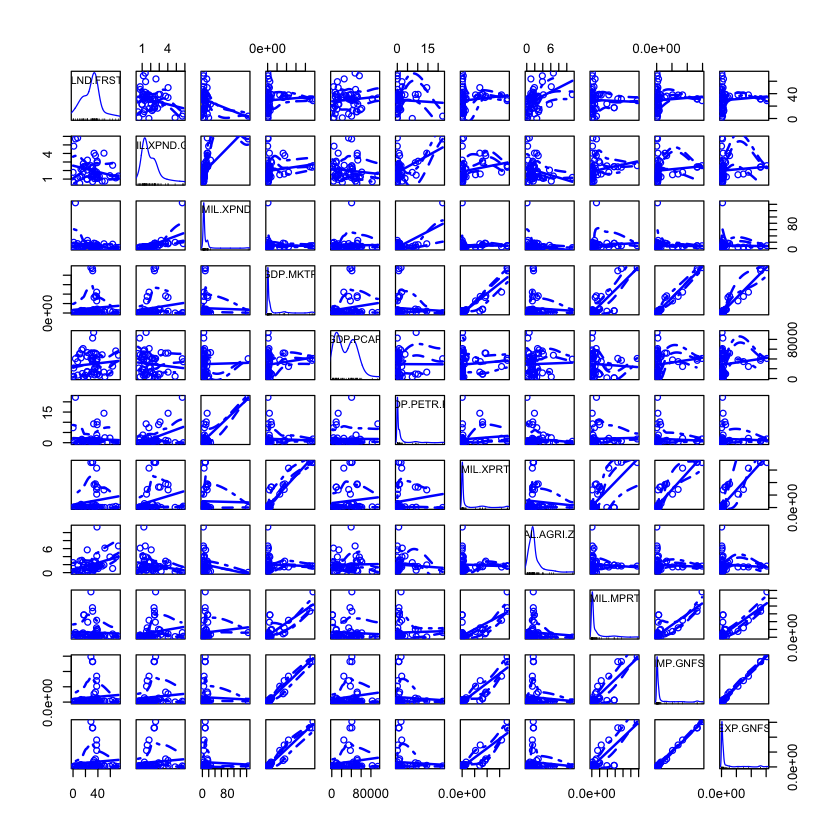

In [411]:
scatterplotMatrix(~ AG.LND.FRST.ZS + MS.MIL.XPND.GD.ZS + MS.MIL.XPND.ZS+NY.GDP.MKTP.CD+NY.GDP.PCAP.CD
                  +NY.GDP.PETR.RT.ZS+MS.MIL.XPRT.KD+TX.VAL.AGRI.ZS.UN
                  +MS.MIL.MPRT.KD+NE.IMP.GNFS.CD+NE.EXP.GNFS.CD, data=Data)

We nontice a strong positive skew in the histograms of most of the variables and we will apply log and sqayre root transformations to the variables of interest in the following sections in order improve the normality of residuals of our linear regression models.

**1.3** Run: `apply(!is.na(Data[,-(1:2)] ) , MARGIN= 2, mean )` and explain what it is showing.

In [412]:
apply(!is.na(Data[,-(1:2)]), MARGIN=2, mean)

AG.LND.FRST.ZS    MS.MIL.MPRT.KD MS.MIL.XPND.GD.ZS    MS.MIL.XPND.ZS 
        0.9696970         0.7651515         0.7765152         0.5151515 
   MS.MIL.XPRT.KD    NE.EXP.GNFS.CD    NE.IMP.GNFS.CD    NY.GDP.MKTP.CD 
        0.2954545         0.8787879         0.8787879         0.9280303 
   NY.GDP.PCAP.CD NY.GDP.PETR.RT.ZS TX.VAL.AGRI.ZS.UN 
        0.9280303         0.9090909         0.8030303

The function **apply** iterates another function over a specified dimension of the array. In this case, the mean function is applied to all columns of the data set except the first two (country code, country name). The !is.na function filters out the values that are NA in the data set. 

**Thus the R code above is showing the mean of values of all numeric variables in the data set.**

**1.4** Can you include both `NE.IMP.GNFS.CD` and `NE.EXP.GNFS.CD` in the same OLS model? Why?

[1] 0.9991012

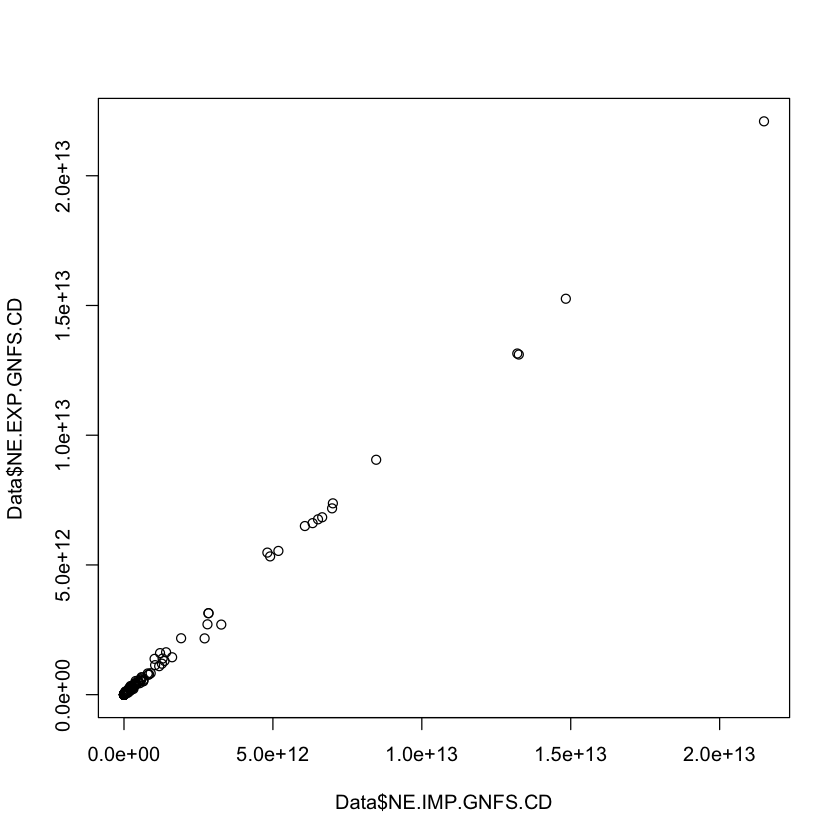

In [413]:
cor(Data$NE.IMP.GNFS.CD,Data$NE.EXP.GNFS.CD, use="complete.obs")
plot(Data$NE.IMP.GNFS.CD,Data$NE.EXP.GNFS.CD)

The correlation coefficient of NE.IMP.GNFS.CD and NE.EXP.GNFS.CD is almost 1 indicating that these variables have almost perfect collinearity. The plot also shows this almost perfect linear relationship among the variables. 
We **cannot** include covariates that have perfect collinearity in OLS regression models.

**1.5** Rename the variable named `AG.LND.FRST.ZS` to `forest.` This is going to be our dependent variable.

In [414]:
Data = rename(Data, forest = AG.LND.FRST.ZS)
head(Data)

Country.Name,Country.Code,forest,MS.MIL.MPRT.KD,MS.MIL.XPND.GD.ZS,MS.MIL.XPND.ZS,MS.MIL.XPRT.KD,NE.EXP.GNFS.CD,NE.IMP.GNFS.CD,NY.GDP.MKTP.CD,NY.GDP.PCAP.CD,NY.GDP.PETR.RT.ZS,TX.VAL.AGRI.ZS.UN
Afghanistan,AFG,2.067825,359166667,1.375170,3.183401,NaN,1304521083,8529983326,18949924158,626.788,0.000000,4.79343482
Albania,ALB,28.244526,9000000,1.413202,NaN,0,3955082222,6365588048,12442032457,4291.004,4.101974,2.20095479
Algeria,DZA,0.813271,721500000,4.843526,14.512495,NaN,70304960460,59880526175,193388057520,5114.370,22.388953,0.01595214
American Samoa,ASM,88.133333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Andorra,ADO,34.042553,NaN,NaN,NaN,NaN,NaN,NaN,3292207861,40935.583,0.000000,NaN
Angola,AGO,46.657576,31333333,4.187594,14.098817,NaN,59957802009,44133763534,109385918387,4730.046,39.340237,NaN


<h3> 2 Decribe a model for that predicts `forest` </h3>

**2.1** Write a model with two explanatory variables. 

In [429]:
my_vars = names(Data) %in% c("Country.Name", "Country.Code")
corData = Data[!my_vars]
corResult = round(cor(corData,use='complete.obs'),2)
mainCorr  = sort(corResult[1,],decreasing = T)
stargazer(mainCorr,type="text",title="Correlation coeeficients of all covariates with forest area", flip=T)


Correlation coeeficients of all covariates with forest area
forest              1   
TX.VAL.AGRI.ZS.UN 0.390 
MS.MIL.XPRT.KD    0.150 
NY.GDP.PCAP.CD    0.110 
NE.EXP.GNFS.CD    0.090 
NY.GDP.MKTP.CD    0.090 
NE.IMP.GNFS.CD    0.080 
MS.MIL.MPRT.KD    -0.040
NY.GDP.PETR.RT.ZS -0.050
MS.MIL.XPND.ZS    -0.240
MS.MIL.XPND.GD.ZS -0.250
------------------------


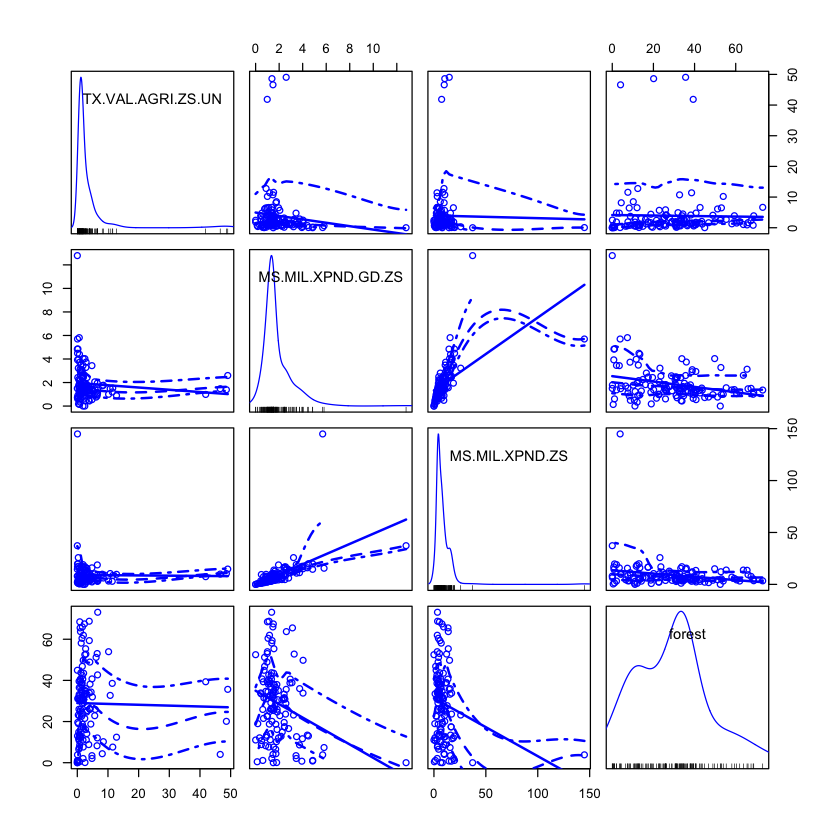

In [416]:
scatterplotMatrix(~ TX.VAL.AGRI.ZS.UN + MS.MIL.XPND.GD.ZS + MS.MIL.XPND.ZS + forest, data = Data)

Since the above three variables have the highest correlation coefficient with our dependant variable of forest area, we will apply transformation to the values in order to make them closer to being normally distributed.

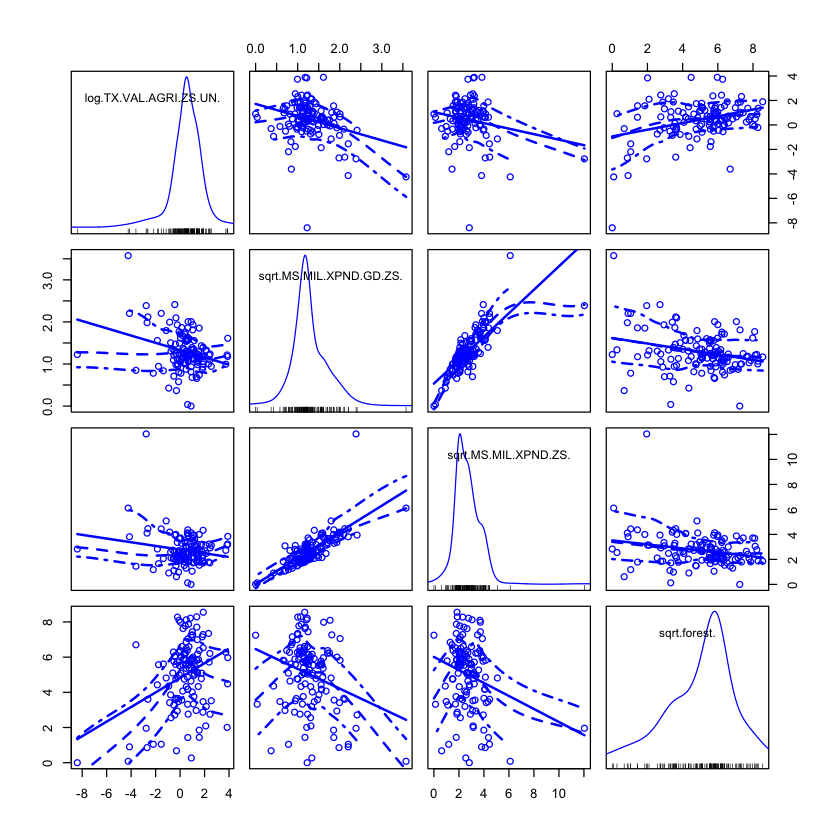

In [417]:
scatterplotMatrix(~ log(TX.VAL.AGRI.ZS.UN) + sqrt(MS.MIL.XPND.GD.ZS) + sqrt(MS.MIL.XPND.ZS) + sqrt(forest), data = Data)

We will use the two variables that have the strongest correlation with forest area : TX.VAL.AGRI.ZS.UN and MS.MIL.XPND.GD.ZS, for building our regression model.

$$\sqrt{forest} = \beta_0 + \beta_1 log(TX.VAL.AGRI.ZS.UN) + \beta_2 \sqrt{MS.MIL.XPND.GD.ZS} + u$$

In [418]:
model1 = lm(sqrt(forest) ~ log(TX.VAL.AGRI.ZS.UN) + sqrt(MS.MIL.XPND.GD.ZS), data = Data)

**2.2** Create a residuals versus fitted values plot and assess whether your coefficients are unbiased.

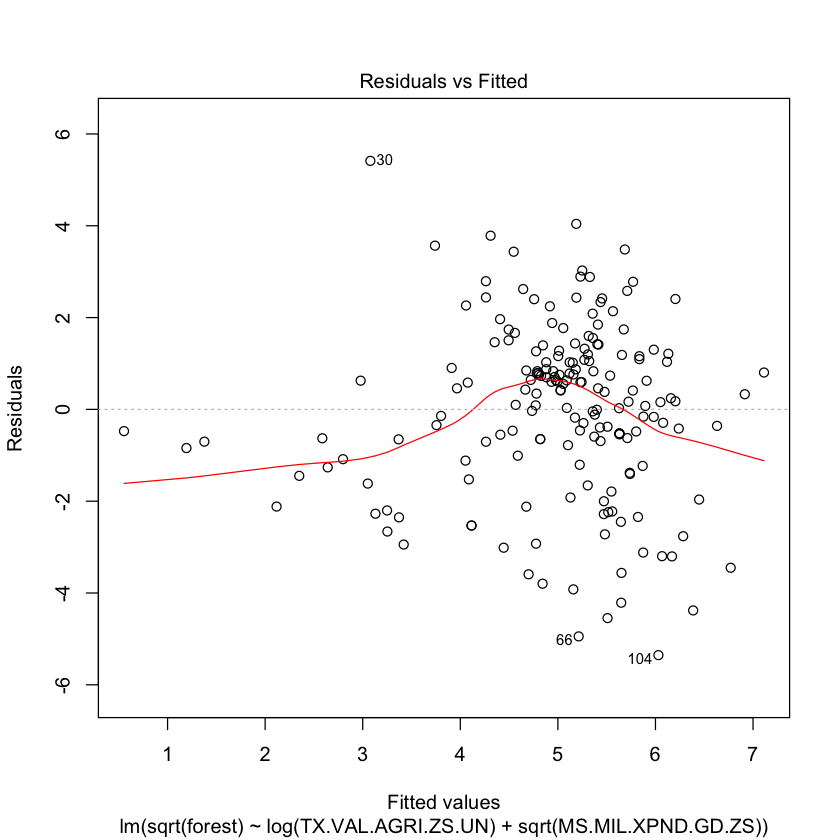

In [419]:
plot(model1, which = 1)

The residuals versus fitted values plot shows that the model violates the zero conditional mean assumption. This indicates that the coefficients of the above regression model are biased. 

**2.3** How many observations are being used in your analysis? 

In [420]:
Data_NA = (Data[is.na(Data$TX.VAL.AGRI.ZS.UN) | is.na(Data$MS.MIL.XPND.GD.ZS),])
nrow(Data_NA)

[1] 81

There are 81 NA values for our right hand side variables in the regression equation. Thus, 264 - 81 = **183** observations are being used in our analysis.

**2.4** Are the countries that are dropping out dropping out by random chance? If not, what would this do to our inference?

In [421]:
Data_NA

,Country.Name,Country.Code,forest,MS.MIL.MPRT.KD,MS.MIL.XPND.GD.ZS,MS.MIL.XPND.ZS,MS.MIL.XPRT.KD,NE.EXP.GNFS.CD,NE.IMP.GNFS.CD,NY.GDP.MKTP.CD,NY.GDP.PCAP.CD,NY.GDP.PETR.RT.ZS,TX.VAL.AGRI.ZS.UN
4,American Samoa,ASM,8.813333e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Andorra,ADO,3.404255e+01,NaN,NaN,NaN,NaN,NaN,NaN,3292207861,40935.5826,0.0000000,NaN
6,Angola,AGO,4.665758e+01,31333333,4.187594,14.09882,NaN,59957802009,44133763534,109385918387,4730.0456,39.3402374,NaN
7,Antigua and Barbuda,ATG,2.227273e+01,NaN,NaN,NaN,NaN,547002901,694336278,1198169901,13377.3018,0.0000000,1.776580605
11,Aruba,ABW,2.333333e+00,NaN,NaN,NaN,NaN,1673388268,2040081006,2526083799,24821.4645,0.0000000,0.078430003
15,"Bahamas, The",BHS,5.144855e+01,25500000,NaN,NaN,0,3614441133,4626214301,8310081905,22163.0075,0.0000000,0.515195759
18,Barbados,BRB,1.465116e+01,NaN,NaN,NaN,NaN,1713416667,2152833333,4367166667,15488.3766,0.6382426,0.415439283
23,Bermuda,BMU,2.000000e+01,NaN,NaN,NaN,NaN,2648802500,1642802250,5601608000,86346.7517,0.0000000,0.020625757
24,Bhutan,BTN,7.162456e+01,1000000,NaN,NaN,NaN,740089116,1200061330,1824791268,2435.8755,0.0000000,0.397413006
29,British Virgin Islands,VGB,2.420000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Most of the countries dropping out have a oil rent (% of GDP) values significantly less than the mean. However, there are also a few countries that are dropping out by chance ( oil rent > mean). 

Since, there is a systematic drop out of countries with lower than mean oil rent values for the two variables used in our regression modeling, our model coefficients will be biased estimators of the effect on forest area. The model will less accurately predict the impact of the agriculture raw material exports and military expenditure on forest area for lowere oil rent countries. 

**2.5** Now add a third variable.

We will add MS.MIL.XPND.ZS that has the third highest magnitude of correlation coefficient (from 2.1 above)

$$ \sqrt{forest} = \beta_0 + \beta_1 log(TX.VAL.AGRI.ZS.UN) + \beta_2 \sqrt{MS.MIL.XPND.GD.ZS} + \beta_3 \sqrt{MS.MIL.XPND.ZS} + u $$

In [430]:
model2 = lm(sqrt(forest) ~ log(TX.VAL.AGRI.ZS.UN) + sqrt(MS.MIL.XPND.GD.ZS) + sqrt(MS.MIL.XPND.ZS), data = Data)
model2$coefficients

(Intercept)  log(TX.VAL.AGRI.ZS.UN) sqrt(MS.MIL.XPND.GD.ZS) 
              5.8521137               0.3540128              -0.3991784 
   sqrt(MS.MIL.XPND.ZS) 
             -0.1785662

**2.6** Show how you would use the regression anatomy formula to compute the coefficient on your third variable.  First, regress the third variable on your first two variables and extract the residuals.  Next, regress forest on the residuals from the first stage.

In [423]:
model_MS.MIL.XPND.ZS = lm(sqrt(MS.MIL.XPND.ZS) ~ log(TX.VAL.AGRI.ZS.UN) + sqrt(MS.MIL.XPND.GD.ZS), data=Data)
Data_mod = (Data[!is.na(Data$TX.VAL.AGRI.ZS.UN) & !is.na(Data$MS.MIL.XPND.GD.ZS) & !is.na(Data$MS.MIL.XPND.ZS),] )
modelRegAnatomy = lm(sqrt(Data_mod$forest) ~ model_MS.MIL.XPND.ZS$residuals)
modelRegAnatomy$coefficients

(Intercept) model_MS.MIL.XPND.ZS$residuals 
                     5.0062917                     -0.1785662

**2.7** Compare your two models. Do you see an improvement? Explain how you can tell.

In [424]:
stargazer(model1, model2, report='vc', type="text", align=T)


                                     Dependent variable:              
                        ----------------------------------------------
                                         sqrt(forest)                 
                                  (1)                    (2)          
----------------------------------------------------------------------
log(TX.VAL.AGRI.ZS.UN)           0.348                  0.354         
                                                                      
sqrt(MS.MIL.XPND.GD.ZS)         -1.280                  -0.399        
                                                                      
sqrt(MS.MIL.XPND.ZS)                                    -0.179        
                                                                      
Constant                         6.605                  5.852         
                                                                      
----------------------------------------------------------------------
Obser

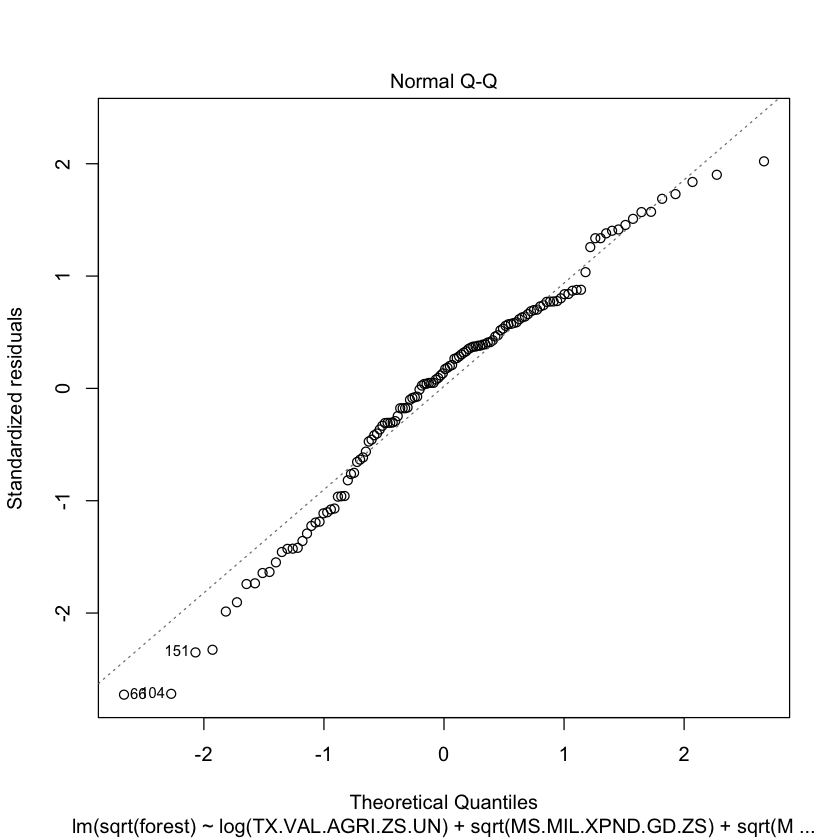

In [425]:
plot(model2, which =2)

The new model has reduced $R^2$ coefficient compared to model1. Only 15.2% of variation in the square root of forest area is explained by the parameters in model2 compared to 22.0% of the variation explained by model1 parameters. 



<h3> 3 Make up a country </h3>

In [426]:
beta0 = as.numeric(model2$coefficients[1])
beta1 = as.numeric(model2$coefficients[2])
beta2 = as.numeric(model2$coefficients[3])
beta3 = as.numeric(model2$coefficients[4])

** 3.1 ** Make up a country named `Mediland` which has every indicator set at the median value observed in the data. 

In [427]:
Mediland.TX.VAL.AGRI.ZS.UN = mean(!is.na(Data$TX.VAL.AGRI.ZS.UN))
Mediland.MS.MIL.XPND.GD.ZS = mean(!is.na(Data$MS.MIL.XPND.GD.ZS))
Mediland.MS.MIL.XPND.ZS = mean(!is.na(Data$MS.MIL.XPND.ZS))

**3.2** How much forest would this country have?

$$ \sqrt{forest} = \beta_0 + \beta_1 log(TX.VAL.AGRI.ZS.UN) + \beta_2 \sqrt{MS.MIL.XPND.GD.ZS} + \beta_3 \sqrt{MS.MIL.XPND.ZS} + u $$

In [428]:
Mediland.forest = (beta0  + beta1 * log(Mediland.TX.VAL.AGRI.ZS.UN) + beta2 * sqrt(Mediland.MS.MIL.XPND.GD.ZS) + beta3 * sqrt(Mediland.MS.MIL.XPND.ZS))^2
sprintf("Expected forest area %% in Mediland: %3f", Mediland.forest)

[1] "Expected forest area % in Mediland: 28.032110"

**3.3** What is the causal story, if any, that you can take away from the above analysis? Explain why.

Based on the above analysis, an increase in argiculture raw materials is related to an increase in forest area while increase in miliatry expenditure is related to a decrease in forest area in a country. 